In [369]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import glob, os
from datetime import datetime
from functools import partial, reduce

In [115]:
# load data

cwd = os.getcwd()
files = glob.glob(cwd +'/src' + "/*.csv")

dfs = []
for file in files:
    dfs.append(pd.read_csv(file,index_col=None,quoting=2,error_bad_lines=False,dtype="string"))

df_orig = pd.concat(dfs)

In [116]:
print(df_orig)
display(df_orig.dtypes)

       tag_number_masked date_of_infraction infraction_code  \
0               ***39755           20170101              29   
1               ***10593           20170101               9   
2               ***39756           20170101              29   
3               ***92318           20170101               5   
4               ***39757           20170101              29   
...                  ...                ...             ...   
153659          ***42841           20201231             347   
153660          ***18794           20201231               3   
153661          ***36469           20201231               3   
153662          ***38382           20201231               3   
153663          ***13890           20201231               3   

                infraction_description set_fine_amount time_of_infraction  \
0       PARK PROHIBITED TIME NO PERMIT              30               0000   
1       STOP-SIGNED HWY-PROHIBIT TM/DY              60               0001   
2       PARK

tag_number_masked         string
date_of_infraction        string
infraction_code           string
infraction_description    string
set_fine_amount           string
time_of_infraction        string
location1                 string
location2                 string
location3                 string
location4                 string
province                  string
dtype: object

In [117]:
# clean & transform data

df_orig = df_orig.astype({"infraction_code": "Int64", 
                          "set_fine_amount": "Int64"})
df_orig = df_orig.drop(['tag_number_masked','location3','location4'],axis=1)
df = df_orig
df = df.dropna()
df = df.reset_index(drop=True)
df = df[df['time_of_infraction'].str[:2].astype(int) <= 23]

#df["date_time"] = df["date_of_infraction"]+df["time_of_infraction"]+"00"
#df["date_time"] = pd.to_datetime(df["date_time"])

df["year"] = df["date_of_infraction"].str[:4]
df["month"] = df["date_of_infraction"].str[4:6]
df["day"] = df["date_of_infraction"].str[6:]

df = df.astype({"year": int, "month": int, "day": int})

df["date"] = pd.to_datetime(df["date_of_infraction"])
df["time"] = pd.to_datetime(df["time_of_infraction"], format="%H%M")

df = df.drop(['date_of_infraction','time_of_infraction'],axis=1)

In [384]:
df["day_of_week"] = df["date"].dt.day_name()

In [393]:
df["hour"] = df["time"].dt.hour

In [ ]:
# save data

df_orig.to_csv(cwd +'\data' + "\original data.csv")
df.to_csv(cwd +'\data' + "\transformed data.csv")

In [394]:
print(df)
display(df.dtypes)

         infraction_code          infraction_description  set_fine_amount  \
0                     29  PARK PROHIBITED TIME NO PERMIT               30   
1                      9  STOP-SIGNED HWY-PROHIBIT TM/DY               60   
2                     29  PARK PROHIBITED TIME NO PERMIT               30   
3                      5  PARK-SIGNED HWY-PROHIBIT DY/TM               50   
4                     29  PARK PROHIBITED TIME NO PERMIT               30   
...                  ...                             ...              ...   
7028913              347            PARK IN A FIRE ROUTE              250   
7028914                3        PARK ON PRIVATE PROPERTY               30   
7028915                9  STOP-SIGNED HWY-PROHIBIT TM/DY              100   
7028916                3        PARK ON PRIVATE PROPERTY               30   
7028917                3        PARK ON PRIVATE PROPERTY               30   

        location1                location2 province  year  month  day  \
0 

infraction_code                    Int64
infraction_description            string
set_fine_amount                    Int64
location1                         string
location2                         string
province                          string
year                               int32
month                              int32
day                                int32
date                      datetime64[ns]
time                      datetime64[ns]
day_of_week                       object
hour                               int64
dtype: object

In [445]:
# count
description = pd.DataFrame()
# infraction description
description["overall"] = df["infraction_description"].value_counts().head(10)
description["2017"] = df[df["year"]==2017]["infraction_description"].value_counts().head(10).index
description["2018"] = df[df["year"]==2018]["infraction_description"].value_counts().head(10).index
description["2019"] = df[df["year"]==2019]["infraction_description"].value_counts().head(10).index
description["2020"] = df[df["year"]==2020]["infraction_description"].value_counts().head(10).index

display(description)
#print(pd.crosstab(index=df['infraction_description'], columns=df['year']).head(10))
# revenue per year
# revenue per month over time
# number of tickets per month over time

,overall,2017,2018,2019,2020
PARK-SIGNED HWY-PROHIBIT DY/TM,1254558,PARK-SIGNED HWY-PROHIBIT DY/TM,PARK-SIGNED HWY-PROHIBIT DY/TM,PARK-SIGNED HWY-PROHIBIT DY/TM,PARK MACHINE-REQD FEE NOT PAID
PARK PROHIBITED TIME NO PERMIT,1074066,PARK PROHIBITED TIME NO PERMIT,PARK PROHIBITED TIME NO PERMIT,PARK MACHINE-REQD FEE NOT PAID,PARK ON PRIVATE PROPERTY
PARK MACHINE-REQD FEE NOT PAID,985479,PARK MACHINE-REQD FEE NOT PAID,PARK ON PRIVATE PROPERTY,PARK ON PRIVATE PROPERTY,PARK-SIGNED HWY-PROHIBIT DY/TM
PARK ON PRIVATE PROPERTY,975449,PARK ON PRIVATE PROPERTY,PARK MACHINE-REQD FEE NOT PAID,PARK PROHIBITED TIME NO PERMIT,PARK PROHIBITED TIME NO PERMIT
PARK - LONGER THAN 3 HOURS,448061,PARK - LONGER THAN 3 HOURS,PARK - LONGER THAN 3 HOURS,PARK - LONGER THAN 3 HOURS,STOP-SIGNED HWY-PROHIBIT TM/DY
STOP-SIGNED HWY-PROHIBIT TM/DY,383519,STOP-SIGNED HWY-PROHIBIT TM/DY,STOP-SIGNED HWY-PROHIBIT TM/DY,STOP-SIGNED HWY-PROHIBIT TM/DY,PARK - LONGER THAN 3 HOURS
PARK-VEH. W/O VALID ONT PLATE,294654,STAND VEH.-PROHIBIT TIME/DAY,PARK-VEH. W/O VALID ONT PLATE,PARK-VEH. W/O VALID ONT PLATE,STAND VEH.-PROHIBIT TIME/DAY
STAND VEH.-PROHIBIT TIME/DAY,268777,PARK-VEH. W/O VALID ONT PLATE,STAND VEH.-PROHIBIT TIME/DAY,STAND VEH.-PROHIBIT TIME/DAY,PARK-SIGNED HWY-EXC PERMT TIME
STOP-SIGNED HIGHWAY-RUSH HOUR,225644,STOP-SIGNED HIGHWAY-RUSH HOUR,STOP-SIGNED HIGHWAY-RUSH HOUR,STOP-SIGNED HIGHWAY-RUSH HOUR,PARK-VEH. W/O VALID ONT PLATE
PARK-SIGNED HWY-EXC PERMT TIME,214344,PARK-SIGNED HWY-EXC PERMT TIME,PARK-SIGNED HWY-EXC PERMT TIME,PARK-SIGNED HWY-EXC PERMT TIME,PARK-N.YORK 2AM-6AM DEC1-MAR31


In [455]:
# sum
rev = df.groupby(['year','month'])["set_fine_amount"].sum()
df.groupby(['year'])["set_fine_amount"].sum()
df.groupby(['year','infraction_description'])["set_fine_amount"].sum()
df.groupby(['location2']).sum().set_fine_amount.sort_values(ascending=False).head(10)

location2
40 ORCHARD VIEW BLVD    1538310
18 GRENVILLE ST         1073305
1 BRIMLEY RD S          1039020
410 COLLEGE ST          1024925
21 HILLCREST AVE        1022140
150 DAN LECKIE WAY       904370
22 MC CAUL ST            716250
20 EDWARD ST             713195
19 GRAND TRUNK CRES      624930
555 REXDALE BLVD         598110
Name: set_fine_amount, dtype: Int64

Text(0.5, 1.0, 'Yearly Revenue')

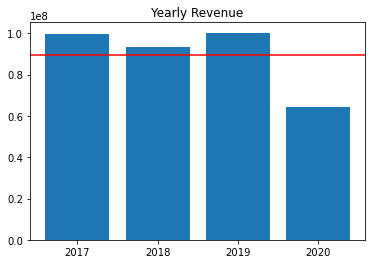

In [377]:
# revenue
total_rev = sum(df["set_fine_amount"])
total_rev
plt.bar(df.groupby(['year'])["set_fine_amount"].sum().index,df.groupby(['year'])["set_fine_amount"].sum())
plt.axhline(y=statistics.mean(df.groupby(['year'])["set_fine_amount"].sum()), color="r")
plt.xticks(df.groupby(['year'])["set_fine_amount"].sum().index, df.groupby(['year'])["set_fine_amount"].sum().index)
plt.title("Yearly Revenue")

In [453]:
statistics.mean(df.groupby(['year'])["set_fine_amount"].sum())

89525731

In [57]:
# analysis
df['date_time'][1].date().year
df["year"] = df["date_time"].date().year
# total revenue
# revenue per year


AttributeError: 'Series' object has no attribute 'date'

In [266]:
# graphs
# revenue per month over all years
# number of tickets per month over time

In [ ]:
# needs
#1) Location based profitability
#2) most profitable ticket types
#3) most common time of infraction

# # tickets / month over all times compare population over time -> correlation -> increase employment
# - # of tickets/month/year
# # tickets vs revenue /monthly
# x: hrs, y: tickets; per year
# x: hrs, y: rev; per year
# top locations each year by rev/tickets, month/year, time
# 单价*数量 of 罚单
# revenue/#tickets prediction

# factors:
# holiday, weekday/weekend, season, increase in facilities/population/#cars, income/expense, macro, economy, gas

# hired, salary expense, inrease in officer -> increase in 

Text(0.5, 1.0, 'Revenue per Hour, 2017-2020')

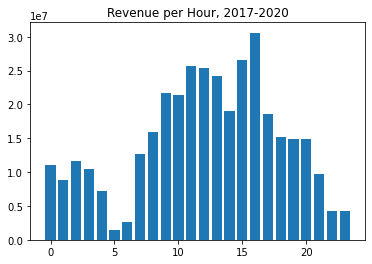

In [408]:
#df.groupby(['hour']).sum().set_fine_amount.sort_values(ascending=False)
plt.bar(df.groupby(['hour'])["set_fine_amount"].sum().index,df.groupby(['hour'])["set_fine_amount"].sum())
#plt.bar(df.groupby(['hour'])["set_fine_amount"].count().index,df.groupby(['hour'])["set_fine_amount"].count())
plt.title("Revenue per Hour, 2017-2020")

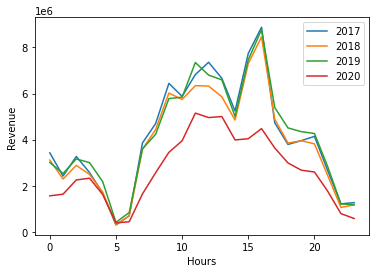

In [443]:
plt.plot(np.array(df[df["year"]==2017].groupby(['hour'])["set_fine_amount"].sum().index),np.array(df[df["year"]==2017].groupby(['hour'])["set_fine_amount"].sum()), label="2017")
plt.plot(np.array(df[df["year"]==2018].groupby(['hour'])["set_fine_amount"].sum().index),np.array(df[df["year"]==2018].groupby(['hour'])["set_fine_amount"].sum()), label="2018")
plt.plot(np.array(df[df["year"]==2019].groupby(['hour'])["set_fine_amount"].sum().index),np.array(df[df["year"]==2019].groupby(['hour'])["set_fine_amount"].sum()), label="2019")
plt.plot(np.array(df[df["year"]==2020].groupby(['hour'])["set_fine_amount"].sum().index),np.array(df[df["year"]==2020].groupby(['hour'])["set_fine_amount"].sum()), label="2020")
plt.xlabel('Hours')
plt.ylabel('Revenue')
plt.legend()

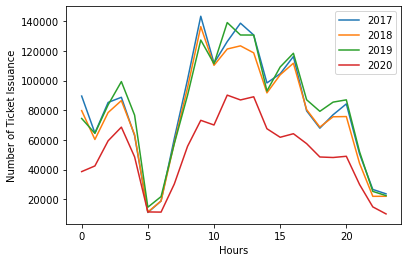

In [444]:
plt.plot(np.array(df[df["year"]==2017].groupby(['hour'])["set_fine_amount"].count().index),np.array(df[df["year"]==2017].groupby(['hour'])["set_fine_amount"].count()), label="2017")
plt.plot(np.array(df[df["year"]==2018].groupby(['hour'])["set_fine_amount"].count().index),np.array(df[df["year"]==2018].groupby(['hour'])["set_fine_amount"].count()), label="2018")
plt.plot(np.array(df[df["year"]==2019].groupby(['hour'])["set_fine_amount"].count().index),np.array(df[df["year"]==2019].groupby(['hour'])["set_fine_amount"].count()), label="2019")
plt.plot(np.array(df[df["year"]==2020].groupby(['hour'])["set_fine_amount"].count().index),np.array(df[df["year"]==2020].groupby(['hour'])["set_fine_amount"].count()), label="2020")
plt.xlabel('Hours')
plt.ylabel('Number of Ticket Issuance')
plt.legend()

Text(0.5, 1.0, 'Number of Ticket Issuance per Hour, 2017-2020')

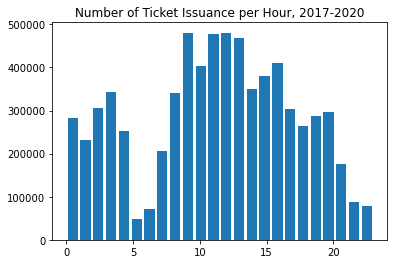

In [410]:
plt.hist(df["hour"],24,(0,23),rwidth = 0.8)
plt.title("Number of Ticket Issuance per Hour, 2017-2020")

Text(0, 0.5, 'Revenue')

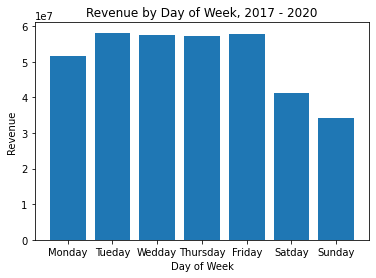

In [392]:
group_day_of_week = df.groupby(['day_of_week'])
rev_by_day = group_day_of_week.agg({'set_fine_amount': ['count', 'sum']}).reset_index()#.to_csv(cwd +'\data' + "\fine per month.csv")

plt.bar(["Monday","Tueday","Wedday","Thursday","Friday","Satday","Sunday"], 
        [51631185, 58187190, 57511280, 57190885, 57854870, 41383350, 34344165])
plt.title('Revenue by Day of Week, 2017 - 2020')
plt.xlabel("Day of Week")
plt.ylabel("Revenue")

Text(0, 0.5, 'Number of Tickets')

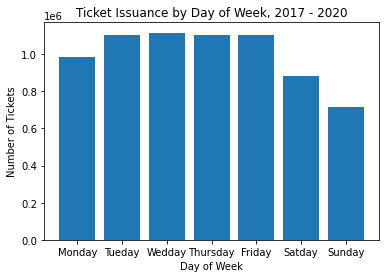

In [452]:
plt.bar(["Monday","Tueday","Wedday","Thursday","Friday","Satday","Sunday"], 
        [986237, 1103163, 1115772, 1103163, 1104674, 883728, 713755])
plt.title('Ticket Issuance by Day of Week, 2017 - 2020')
plt.xlabel("Day of Week")
plt.ylabel("Number of Tickets")

Text(0, 0.5, 'Revenue')

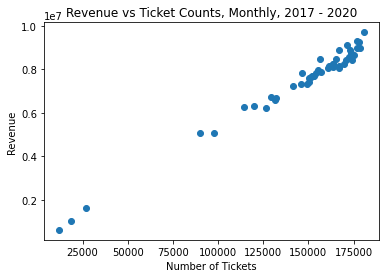

In [273]:
group_year_month = df.groupby(['year','month'])
fines_by_month = group_year_month.agg({'set_fine_amount': ['count', 'sum']}).reset_index()#.to_csv(cwd +'\data' + "\fine per month.csv")

plt.scatter(fines_by_month["set_fine_amount"]["count"].to_numpy(), 
            fines_by_month["set_fine_amount"]["sum"].to_numpy())
plt.title('Revenue vs Ticket Counts, Monthly, 2017 - 2020')
plt.xlabel("Number of Tickets")
plt.ylabel("Revenue")

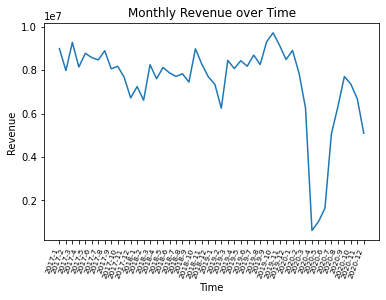

In [274]:
year_month = list(reduce(partial(map, str.__add__), (fines_by_month["year"].astype(str), ["-"]*48, fines_by_month["month"].astype(str))))
plt.plot(list(range(48)),fines_by_month["set_fine_amount"]["sum"].to_numpy())
plt.xticks(list(range(48)), year_month, rotation=70, ha='right')
plt.tick_params(axis='x', which='major', labelsize=7.5)
plt.title('Monthly Revenue over Time')
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.show()

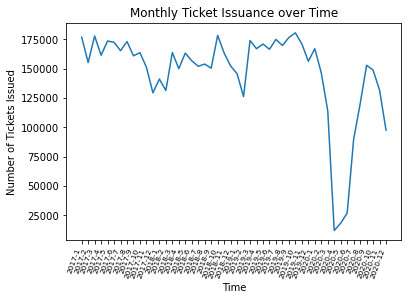

In [265]:
plt.plot(list(range(48)),fines_by_month["set_fine_amount"]["count"].to_numpy())
plt.xticks(list(range(48)), year_month, rotation=70, ha='right')
plt.tick_params(axis='x', which='major', labelsize=7.5)
plt.title('Monthly Ticket Issuance over Time')
plt.xlabel("Time")
plt.ylabel("Number of Tickets Issued")
plt.show()

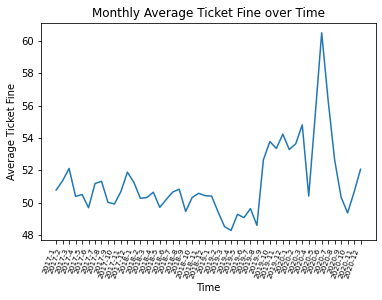

In [264]:
plt.plot(list(range(48)),
         fines_by_month["set_fine_amount"]["sum"].to_numpy()/fines_by_month["set_fine_amount"]["count"].to_numpy())
plt.xticks(list(range(48)), year_month, rotation=70, ha='right')
plt.tick_params(axis='x', which='major', labelsize=7.5)
plt.title('Monthly Average Ticket Fine over Time')
plt.xlabel("Time")
plt.ylabel("Average Ticket Fine")
plt.show()

In [290]:
dates = sorted([*set(df["date"])])
dates

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-03 00:00:00'),
 Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-07 00:00:00'),
 Timestamp('2017-01-08 00:00:00'),
 Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-10 00:00:00'),
 Timestamp('2017-01-11 00:00:00'),
 Timestamp('2017-01-12 00:00:00'),
 Timestamp('2017-01-13 00:00:00'),
 Timestamp('2017-01-14 00:00:00'),
 Timestamp('2017-01-15 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-01-17 00:00:00'),
 Timestamp('2017-01-18 00:00:00'),
 Timestamp('2017-01-19 00:00:00'),
 Timestamp('2017-01-20 00:00:00'),
 Timestamp('2017-01-21 00:00:00'),
 Timestamp('2017-01-22 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-01-24 00:00:00'),
 Timestamp('2017-01-25 00:00:00'),
 Timestamp('2017-01-26 00:00:00'),
 Timestamp('2017-01-27 00:00:00'),
 Timestamp('2017-01-28 00:00:00'),
 Timestamp('2017-01-

Text(0, 0.5, 'Revenue')

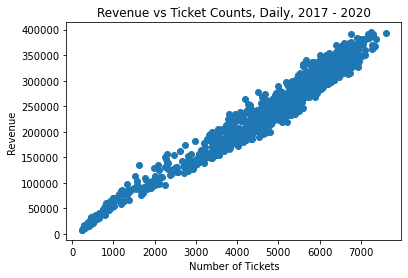

In [293]:
group_date = df.groupby(['date'])
fines_by_date = group_date.agg({'set_fine_amount': ['count', 'sum']}).reset_index()#.to_csv(cwd +'\data' + "\fine per month.csv")

plt.scatter(fines_by_date["set_fine_amount"]["count"].to_numpy(), 
            fines_by_date["set_fine_amount"]["sum"].to_numpy())
plt.title('Revenue vs Ticket Counts, Daily, 2017 - 2020')
plt.xlabel("Number of Tickets")
plt.ylabel("Revenue")

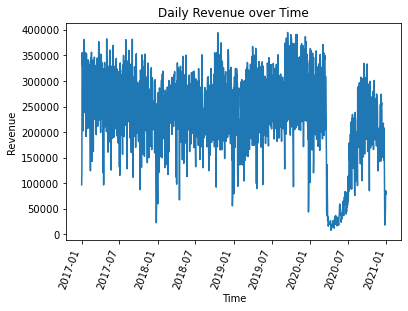

In [301]:
plt.plot(dates,fines_by_date["set_fine_amount"]["sum"].to_numpy())
plt.xticks(rotation=70, ha='right')
#plt.tick_params(axis='x', which='major', labelsize=7.5)
plt.title('Daily Revenue over Time')
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.show()

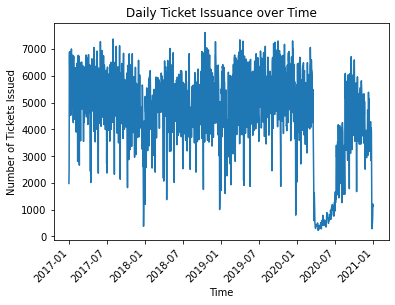

In [295]:
plt.plot(dates,fines_by_date["set_fine_amount"]["count"].to_numpy())
plt.xticks(rotation=45, ha='right')
#plt.tick_params(axis='x', which='major', labelsize=7.5)
plt.title('Daily Ticket Issuance over Time')
plt.xlabel("Time")
plt.ylabel("Number of Tickets Issued")
plt.show()

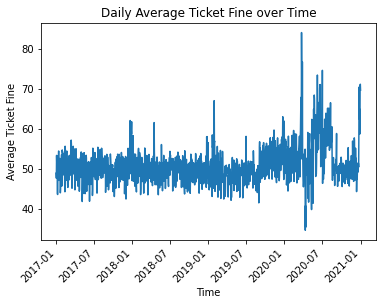

In [312]:
plt.plot(dates,
         fines_by_date["set_fine_amount"]["sum"].to_numpy()/fines_by_date["set_fine_amount"]["count"].to_numpy())
plt.xticks(rotation=45, ha='right')
#plt.tick_params(axis='x', which='major', labelsize=7.5)
plt.title('Daily Average Ticket Fine over Time')
plt.xlabel("Time")
plt.ylabel("Average Ticket Fine")
plt.show()